# Homework 5: Clustering

# Part 1: Clustering Music Preferences

In another class, students were asked about their music preferences by rating each of 11 music genres on a 
scale from 1 (=no way) to 10 (=love it).  The de-indentified results are in the data/music.csv file distributed with this
assignment.

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import scale

import pandas as pd
import seaborn as sns
%matplotlib inline

In [30]:
music = pd.read_csv('data/music.csv')

In [31]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock
0,Muriel,8,7,2,6,8,8,7,6,8,9,9
1,Alexis,4,10,4,3,3,1,10,4,6,5,8
2,Alison,5,10,6,2,3,1,5,6,6,3,5
3,Christopher,3,3,4,3,7,10,2,6,9,8,7
4,Merle,3,3,4,5,6,6,6,4,5,5,6


Your goal for this assignment will be to cluster these students based on their preferences by using a variety of techniques.

### Q1 (40 points). Perform K-means clustering on the music preference data
- Identify the best *k* by using methods that we covered from the lab.
- Plot your results and provide your interpretations.
    - What do you like/dislike about the results?
    - What would improve the results?
    - Explain why.


In [32]:
#-- Separate data from target --
data = music.drop(['Name'], 1)
data = scale(data, axis=0)
target = music['Name'].to_frame()

In [33]:
#--Determine the shape of the data--
n_samples, n_features = data.shape
print(n_samples, n_features)

47 11


In [34]:
#--Find the number of unique values for the target--
n_music = len(np.unique(target))

#--Fit the kmeans model--
k_means = KMeans(init='k-means++', n_clusters=n_music, n_init=10)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=47, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

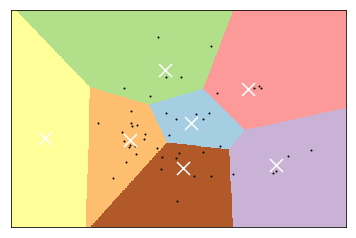

In [35]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### Rule of Thumb Values

In [141]:
from sklearn import metrics
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

#--Rule of thumb method--
n = len(data)
rule_thumb = np.sqrt(n/2)
rule_thumb

4.847679857416329

#### Elbow Method

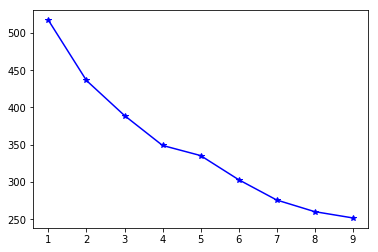

In [152]:
#--Elbow method-- Looks to be flattening out at 7
#--Point you want is where it looks like it's starting to flatten out
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn import metrics

X = data
inertia_values = []
e_results = {}
for k in range(1, 10):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
#     prediction = kmeans.predict(X)
#     e_results[k] = kmeans.inertia_(X, prediction)
    

# fig = plt.figure(figsize=(11, 1))
# plt.plot(range(1, 20), inertia_values)
# plt.grid(True)
# plt.title('Elbow curve')

fig, ax = plt.subplots()
plt.plot(range(1,10), inertia_values, "b*-")
# plt.ylim()

In [143]:
inertia_values

[517.0,
 436.0357580982058,
 384.948486140593,
 355.1746733287589,
 323.1469452284748,
 298.6486436517632,
 284.71144801059125,
 267.7377208427598,
 250.5980733059262,
 223.07744025557227,
 212.89444648785033,
 200.60081760765368,
 184.37731968711853,
 172.83648825725837,
 166.91728315451516,
 156.59515151521134,
 150.09674551338304,
 140.16895880789494,
 136.1815296641135]

#### Silhouette Method

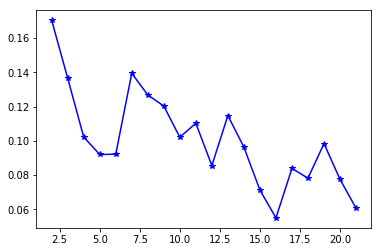

In [164]:
#--Silhouette Method--
from sklearn.metrics import silhouette_samples, silhouette_score 
    
X = data
silhouette_values = []

for k in range(2, 22):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10).fit(X)
    prediction = kmeans.predict(X)
    silhouette_values.append(silhouette_score(data, kmeans.labels_))
    
# best_size = max(results, key=results.get)


fig, ax = plt.subplots()
plt.plot(range(2,22), silhouette_values, "b*-")
# plt.xlim(1, plt.xlim()[1])

### Interpretation for Q1 - finding the best k-value

Three of the methods I used seem to return a similar k-value, while one of the methods did not. The rule of thumb method returned a k-value of 4.84, which is low compared to the other methods. The three methods with the most similar values were the Elbow, Silhouette, and PCA methods. Those methods came back with values around 7. Specifically, I found the best value for PCA to be 7, Elbow plot was around 7, and Silhouette plot was also around 7. 

**Likes/dislike about results**
Considering that three of the methods provided the same result and that one was somewhat off, but not by too much, I'm pleased with the results. I'm not surprised by them as they seem consistent with the pattern from lab - the Elbow, PCA, and Silhouette methods seems to be similar, while the Rule of Thumb was not as close to the others. 

**Ways to improve results**
For the PCA, I noticed that changing the cluster number helped improve the results for that method. I changed the number until I reached a cluster number that had points in each cluster. Once I got to the point where the number was too high and no data points were in a certain cluster, I went to the value below it. I also made sure that the data points within the cluster seemed to have some distance between them, however, certain clusters seemed to have some overlap. I guess that makes sense because people's music taste will greatly vary. 

### Q2 (40 points). Perform hierarchical clustering on the music preference data
- Identify your choice of the best cut point
    - provide justification for your choice
- Compare different loss/linkage functions (e.g., min/single, max/complete, average, and Ward)
- Plot your results and provide interpretations
    - What do you like/dislike about the results?
    - What would improve the results?
    - Who is most similar to whom?  Are there obvious groups?
    - Compare with the k-means result. Which one is better? Explain why.

In [44]:
#--Find cosine similarity--
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(data)
print(dist)

[[ 0.00000000e+00  7.56624739e-01  9.37156766e-01 ...  7.83890174e-01
   9.45733981e-01  8.00494256e-01]
 [ 7.56624739e-01  2.22044605e-16  2.14638871e-01 ...  9.33250660e-01
   7.20978019e-01  8.86171173e-01]
 [ 9.37156766e-01  2.14638871e-01 -2.22044605e-16 ...  1.09970094e+00
   7.66517870e-01  9.34528501e-01]
 ...
 [ 7.83890174e-01  9.33250660e-01  1.09970094e+00 ...  1.11022302e-16
   9.39607355e-01  1.32810367e+00]
 [ 9.45733981e-01  7.20978019e-01  7.66517870e-01 ...  9.39607355e-01
   1.11022302e-16  1.02504006e+00]
 [ 8.00494256e-01  8.86171173e-01  9.34528501e-01 ...  1.32810367e+00
   1.02504006e+00  0.00000000e+00]]


### Ward

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


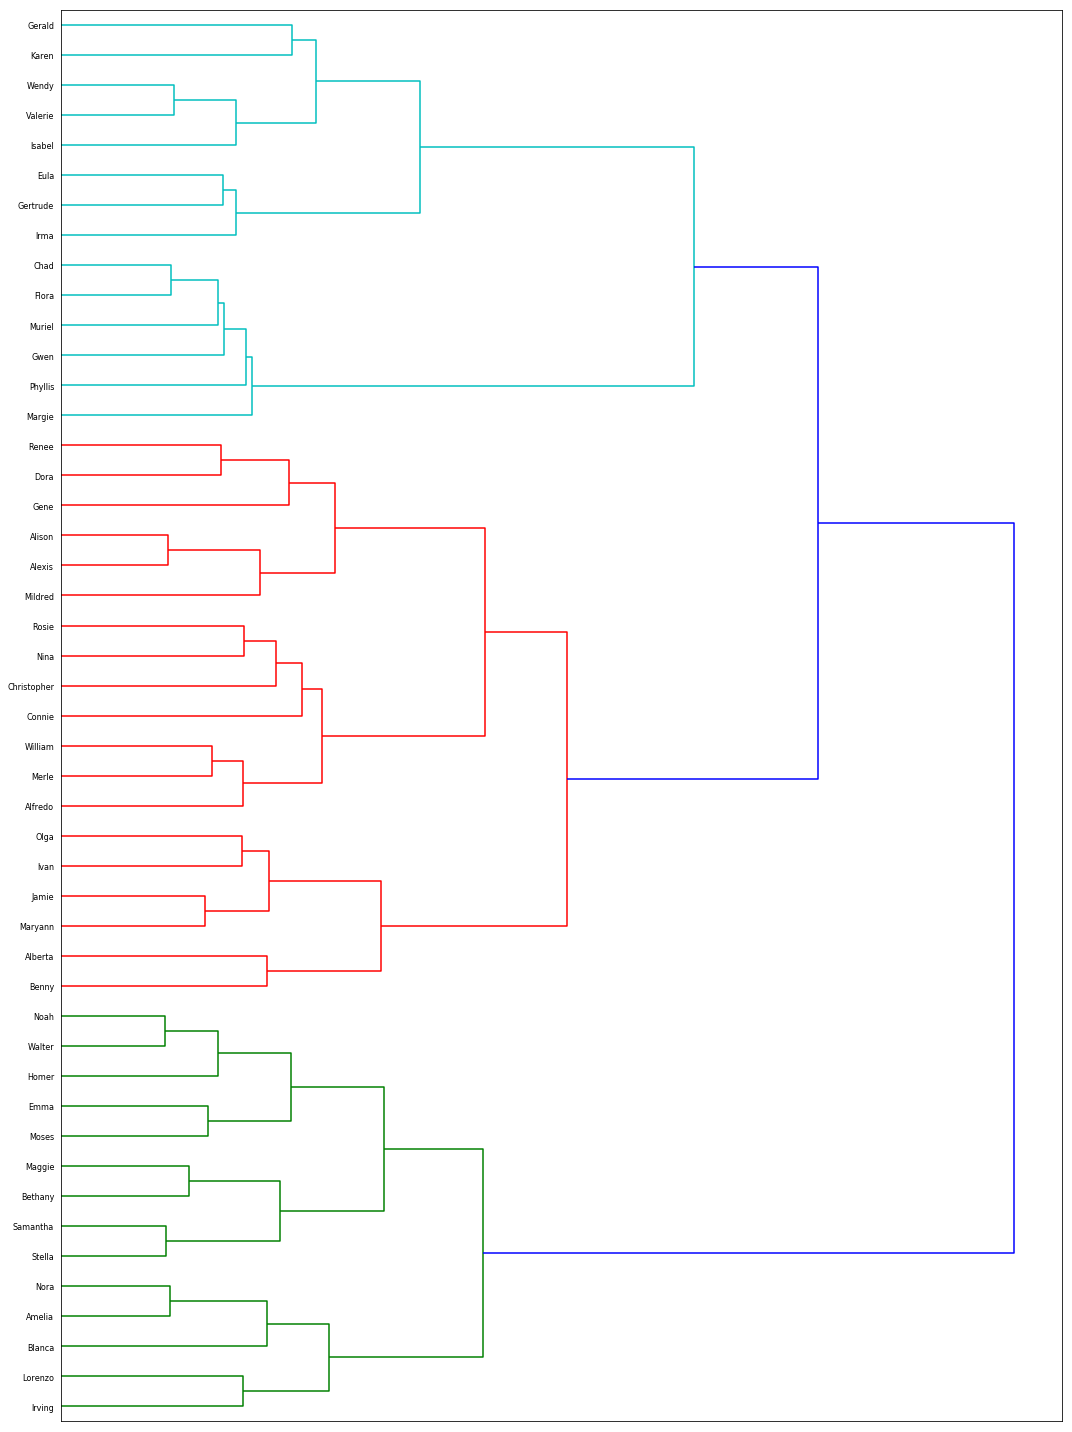

In [46]:
#--Calculate linkage and create dendrogram - WARD--
from scipy.cluster.hierarchy import ward, dendrogram, linkage, single, centroid, average, complete

linkage_matrix_ward = ward(dist)

titles = music['Name'].tolist()
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix_ward, orientation="right", labels=titles);

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

### Single

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


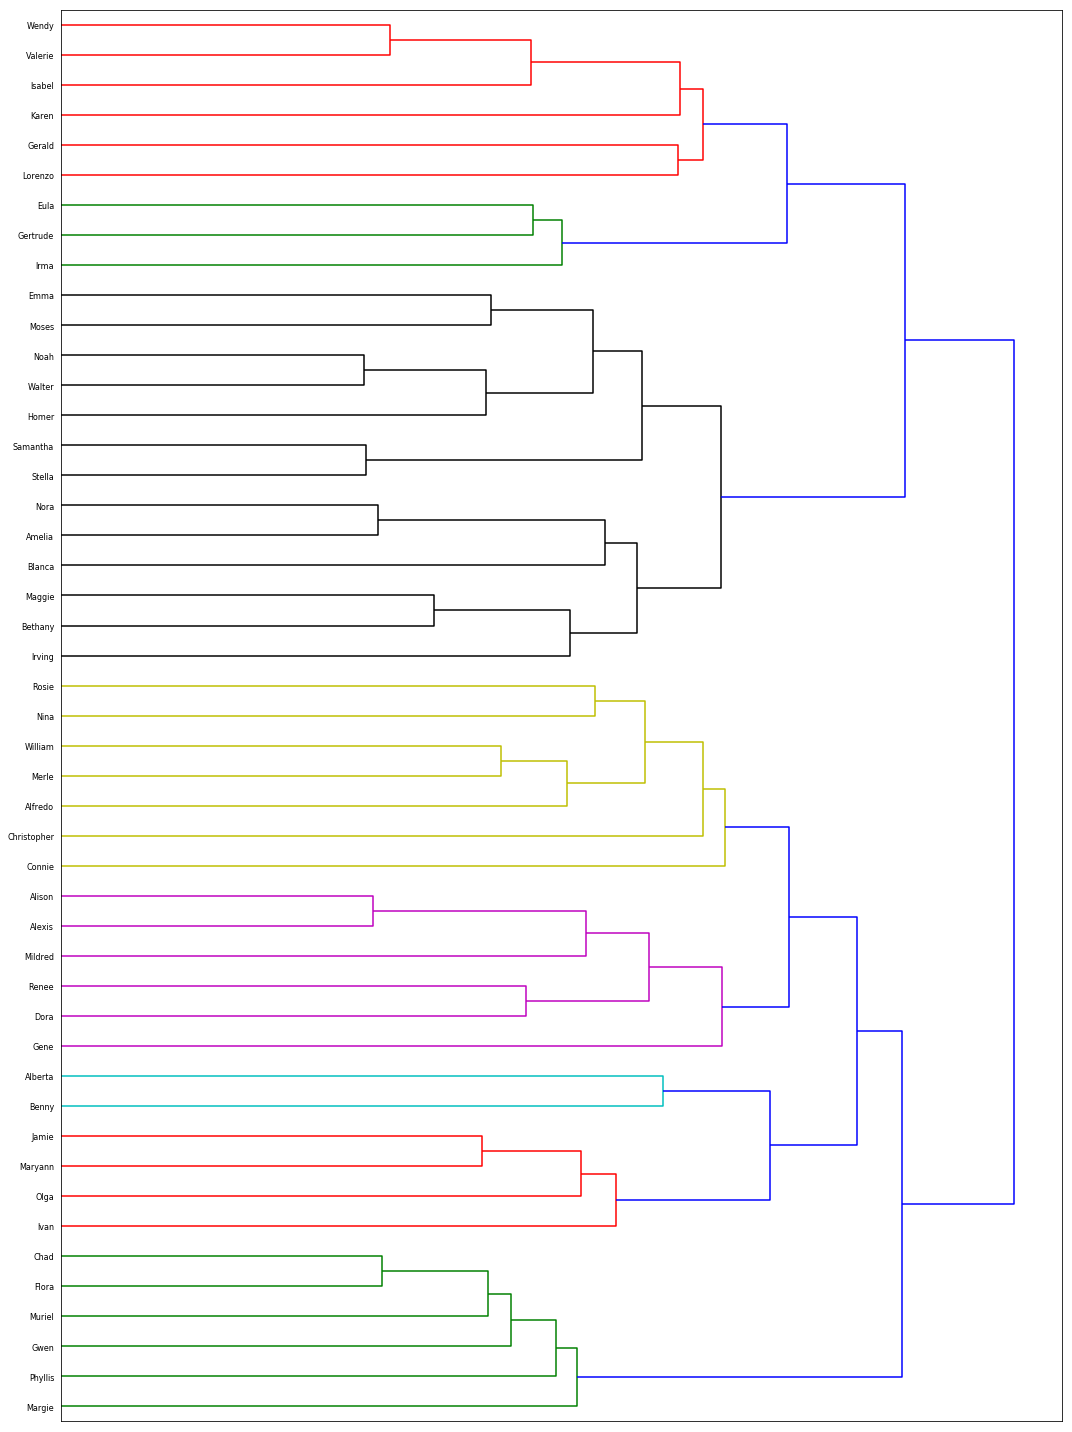

In [182]:
#--Calculate linkage and create dendrogram -SINGLE--
# This dendrogram measures the single distance between each point. The heights correspond with the distances between each point

linkage_matrix_single = single(dist)

titles = music['Name'].tolist()
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

### Complete

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


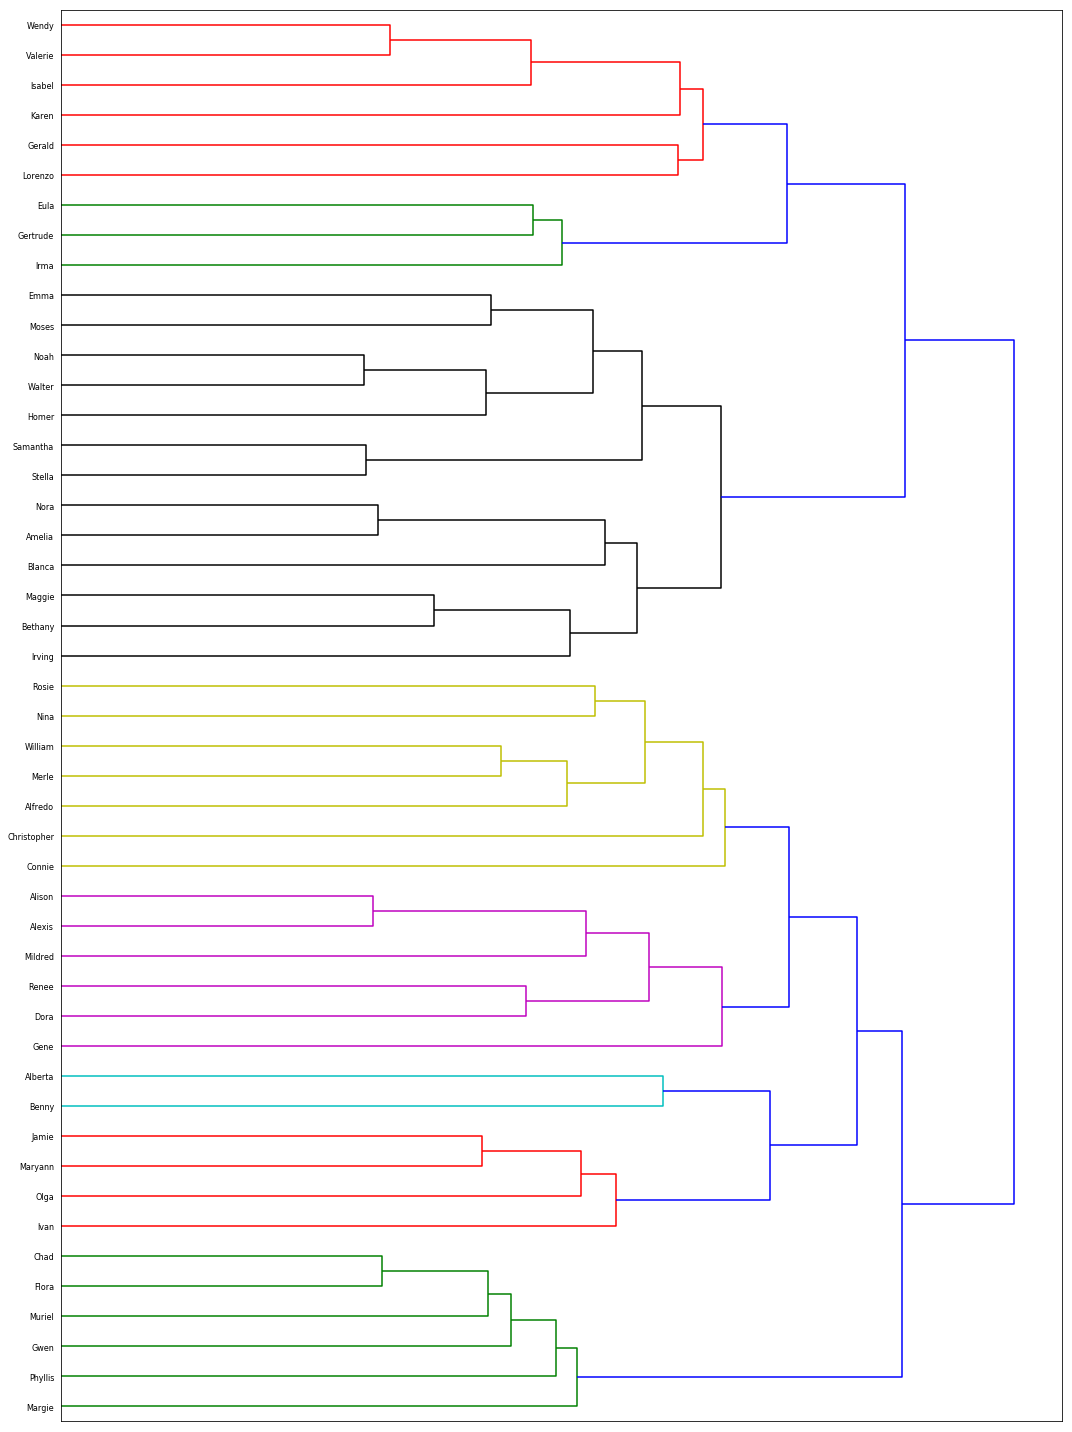

In [183]:
#--Calculate linkage and create dendrogram -COMPLETE--
linkage_matrix_complete = complete(dist)

titles = music['Name'].tolist()
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

### Average

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


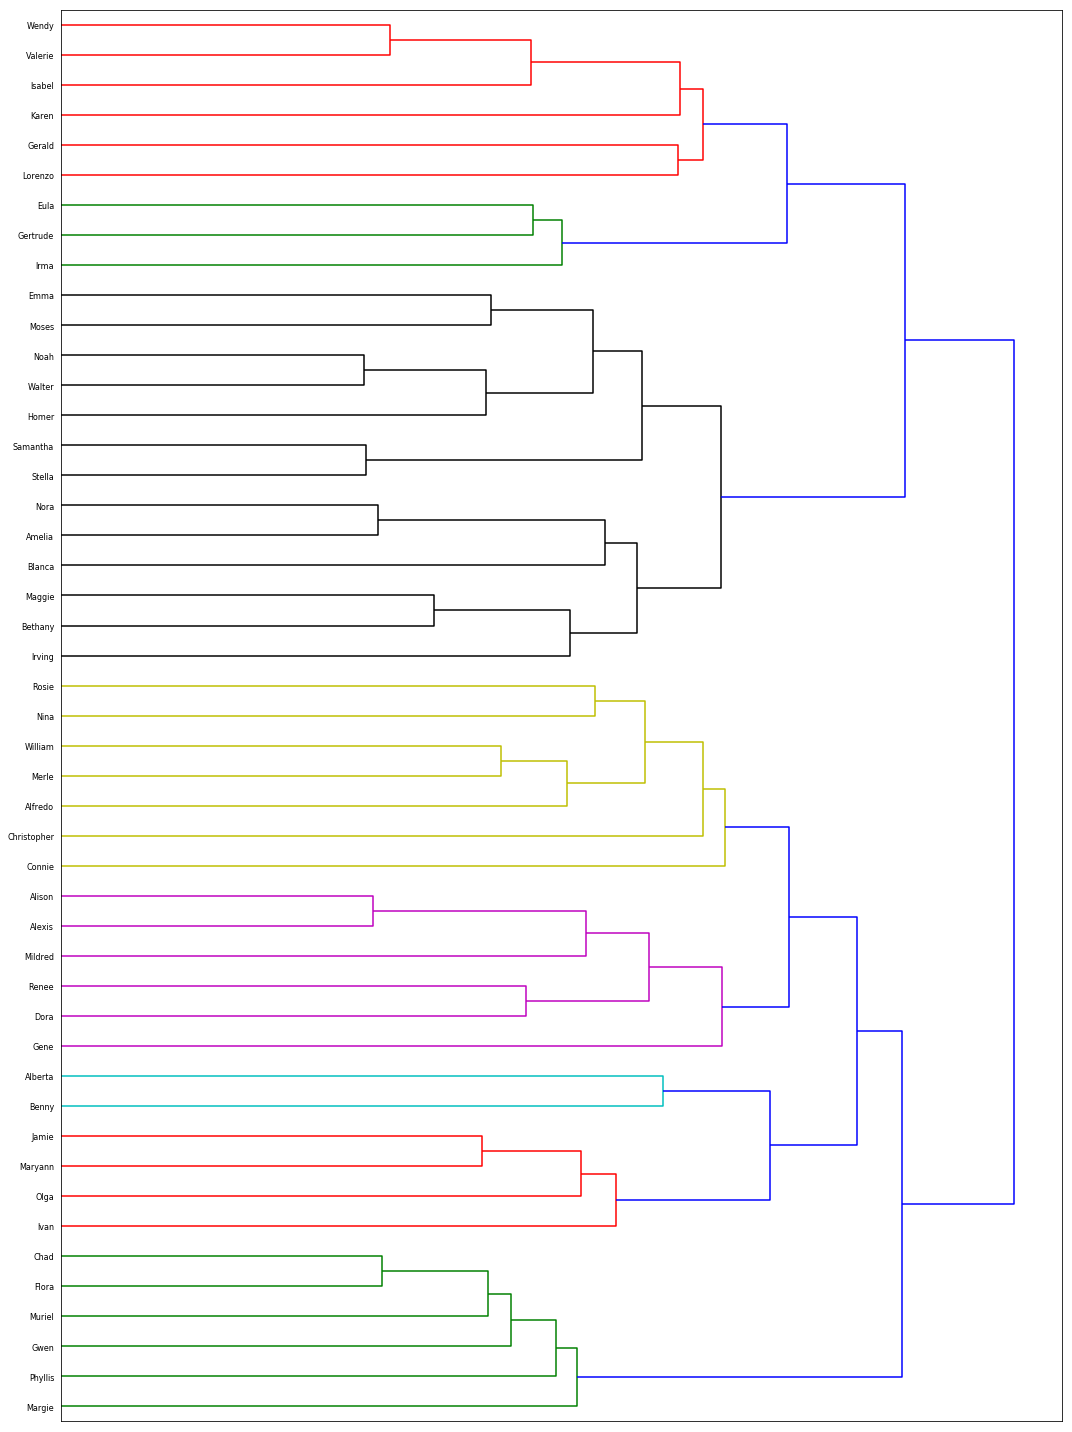

In [184]:
#--Calculate linkage and create dendrogram -AVERAGE--
linkage_matrix_average = average(dist)

titles = music['Name'].tolist()
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
plt.tight_layout()
plt.show()

In [205]:
from scipy.cluster.hierarchy import fcluster

#--Note, there are 4 clusters here due to what it looked like it needed from the ward dendrogram
array_of_clusternums_ward = fcluster(linkage_matrix_ward, 4, criterion='maxclust')
array_of_clusternums_complete = fcluster(linkage_matrix_complete, 5, criterion='maxclust')
array_of_clusternums_average = fcluster(linkage_matrix_average, 5, criterion='maxclust')

music['ward_cluster'] = array_of_clusternums_ward
music['complete_cluster'] = array_of_clusternums_complete
music['average_cluster'] = array_of_clusternums_average
music

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Soul,Rock,ward_cluster,complete_cluster,average_cluster
0,Muriel,8,7,2,6,8,8,7,6,8,9,9,3,5,1
1,Alexis,4,10,4,3,3,1,10,4,6,5,8,2,4,3
2,Alison,5,10,6,2,3,1,5,6,6,3,5,2,4,3
3,Christopher,3,3,4,3,7,10,2,6,9,8,7,2,2,3
4,Merle,3,3,4,5,6,6,6,4,5,5,6,2,2,3
5,Stella,3,2,6,5,2,6,2,1,9,8,6,1,1,4
6,Homer,1,1,2,7,1,7,1,1,9,10,2,1,1,4
7,Bethany,3,4,4,5,2,7,4,4,8,8,5,1,1,4
8,Moses,3,3,3,3,2,7,4,2,7,7,5,1,1,4
9,Gertrude,7,6,1,6,1,10,8,2,9,7,6,4,3,5


#### Plot for Ward Cluster 1 - includes Names of individuals in the cluster and their average scores for each type of music plotted

['Stella', 'Homer', 'Bethany', 'Moses', 'Walter', 'Blanca', 'Noah', 'Amelia', 'Emma', 'Samantha', 'Irving', 'Nora', 'Lorenzo', 'Maggie']


Blues               2.357143
Classical           3.071429
Country             3.000000
Electronic          5.428571
Folk                2.000000
Hip Hop             8.214286
Jazz                3.071429
Latin               3.285714
Pop                 7.000000
Soul                7.714286
Rock                5.428571
ward_cluster        1.000000
complete_cluster    1.142857
average_cluster     4.071429
dtype: float64

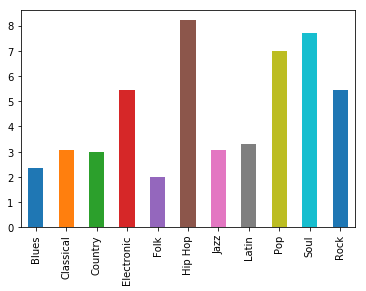

In [217]:
# Plot cluster 1 for ward
ward_clust1 = music[music['ward_cluster'] ==1]
# ward_clust1.plot.bar()

# ward_clust1

ward_clust1_avgs = ward_clust1.mean()
plot_ward1 = ward_clust1_avgs.drop(['ward_cluster', 'complete_cluster', 'average_cluster'])
plot_ward1.plot.bar()
print(list(ward_clust1.Name))

['Alexis', 'Alison', 'Christopher', 'Merle', 'Nina', 'Alfredo', 'Ivan', 'William', 'Connie', 'Maryann', 'Rosie', 'Dora', 'Olga', 'Mildred', 'Gene', 'Benny', 'Jamie', 'Alberta', 'Renee']


Blues               3.210526
Classical           5.052632
Country             5.210526
Electronic          6.263158
Folk                4.315789
Hip Hop             6.315789
Jazz                5.157895
Latin               4.105263
Pop                 6.631579
Soul                5.315789
Rock                6.789474
ward_cluster        2.000000
complete_cluster    3.105263
average_cluster     2.684211
dtype: float64

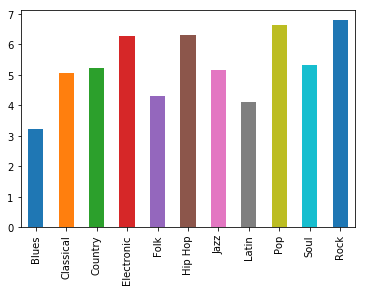

In [216]:
# Plot cluster 2 for ward
ward_clust2 = music[music['ward_cluster'] ==2]
# ward_clust1.plot.bar()

# ward_clust1

ward_clust2_avgs = ward_clust2.mean()
plot_ward2 = ward_clust2_avgs.drop(['ward_cluster', 'complete_cluster', 'average_cluster'])
plot_ward2.plot.bar()
print(list(ward_clust2.Name))

ward_clust2_avgs

['Muriel', 'Flora', 'Chad', 'Gwen', 'Margie', 'Phyllis']


Blues               5.833333
Classical           6.333333
Country             2.166667
Electronic          6.833333
Folk                6.666667
Hip Hop             9.000000
Jazz                6.666667
Latin               4.166667
Pop                 5.333333
Soul                7.500000
Rock                7.666667
ward_cluster        3.000000
complete_cluster    5.000000
average_cluster     1.000000
dtype: float64

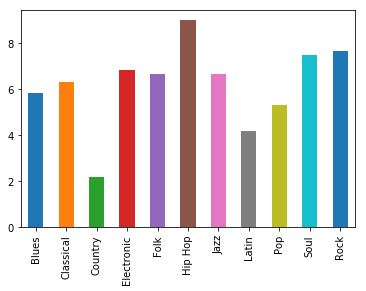

In [218]:
# Plot cluster 2 for ward
ward_clust3 = music[music['ward_cluster'] ==3]
# ward_clust1.plot.bar()

# ward_clust1

ward_clust3_avgs = ward_clust3.mean()
plot_ward3 = ward_clust3_avgs.drop(['ward_cluster', 'complete_cluster', 'average_cluster'])
plot_ward3.plot.bar()
print(list(ward_clust3.Name))

ward_clust3_avgs

['Gertrude', 'Irma', 'Karen', 'Eula', 'Valerie', 'Wendy', 'Isabel', 'Gerald']


Blues               5.500
Classical           3.875
Country             1.250
Electronic          5.625
Folk                1.875
Hip Hop             8.875
Jazz                6.875
Latin               4.500
Pop                 6.625
Soul                8.375
Rock                4.500
ward_cluster        4.000
complete_cluster    3.000
average_cluster     5.000
dtype: float64

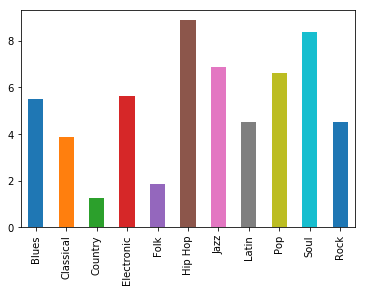

In [219]:
# Plot cluster 2 for ward
ward_clust4 = music[music['ward_cluster'] ==4]
# ward_clust1.plot.bar()

# ward_clust1

ward_clust4_avgs = ward_clust4.mean()
plot_ward4 = ward_clust4_avgs.drop(['ward_cluster', 'complete_cluster', 'average_cluster'])
plot_ward4.plot.bar()
print(list(ward_clust4.Name))

ward_clust4_avgs

### Interpretation for Q2
- Identify your choice of the best cut point
    - provide justification for your choice
- Compare different loss/linkage functions (e.g., min/single, max/complete, average, and Ward)
- Plot your results and provide interpretations
    - What do you like/dislike about the results?
    - What would improve the results?
    - Who is most similar to whom?  Are there obvious groups?
    - Compare with the k-means result. Which one is better? Explain why.

Dendrograms explain how data points are organized in space. With dendrograms, once you have the main structure, you must pick a threshold distance of where to cut off the tree. You will get different clusters of different sizes depending on where you choose to make your cutoff point. The height of the branches corresponds with the distance between the clusters. As the merging distance between clusters increase, the height of each branch also increases.


**Identify your choice of the best cut point**
From the dendrograms above, it seems that the ward dendrogram will be the most useful for our dataset needs. The ward dendrogram shows more distinct clusters, or distances, which makes it easier to determine a cut off point. I used a cutoff point that gives 4 distinct clusters for the ward dendrogram. The reason I chose the cutoff point of 4 is because the horizontal length for each group seems the longest at that point (or the distance between clusters seems the greatest at that point).

**Compare different loss/linkage functions (e.g., min/single, max/complete, average, and Ward)**
For this dataset, the Ward linkage function seemed to be the most useful with determining distinct clusters due to being able to see separate groups closer to the top of the dendrogram. I found it more challenging to find cutoff points for the other 3 dendrograms, leading me to believe that they are not as useful for this dataset. The complete and the average ones were a little easier to read than the single one, but there were not enough distinct differences in length to determine distinct clusters as there was with the Ward dendrogram.

**The Plot your results and provide interpretations**
For this exercise, I chose to focus on plotting the Ward dendrogram because it seemed to have the most distinct clusters from looking at the tree image. To create the plots, I separated people into a new dataframe based upon the cluster they were in. From there, I averaged all of their values for each feature, or type of music because I figured if they were in the same cluster, they probably had similar taste in music. From the charts for each cluster, I can see that hip hop had one of the, if not the, highest values for each cluster. From there I decided to look at which type of music had the lowest average values. 

I noticed the following:

- Cluster 1: Folk and Blues scored the lowest in this group and Hip Hop had the highest average along with Soul and Pop; this group showed distinct scores between most categories.
- Cluster 2: This group had a more flat score among music types. The lowest here were Blues, Folk, and Latin, however, they were not too much lower than the other categories. 
- Cluster 3: The average score for Country music in this group is aournd 2 and is much lower than any of the other categories. This led me to believe that these individuals do not love country music and would prefer to listen to other categories. 
- Cluster 4: This cluster does not prefer Country and does not prefer Folk music. The preferences in this group are a little less consistent compared to clusters 2 and 3. 

**Likes/Dislikes about results**
I like that you can see some distinct differences betwee clusters, like some clusters do no love Country or Folk music. However, there is some overlap between these groups, which makes it a little more challenging to better break down what people's music preference is. 

**What would improve the results**
Something that may improve the results a bit more may be including an age variable. There may be specific music preferences for specific age groups. Also, gathering data from a class would typically mean the data is only coming from a certain type of person that are probably in the same age category and live in the same region. Adding individuals that are not only school age may help round out the data a bit more, but it depends on what the intended results are.  

**Who is most similar to whom?  Are there obvious groups?**
For the groups with less people in them, like Cluster 3 and Cluster 4, it seems like they may be more obvious groups with more distinct preferences. While neither 3 or 4 prefer Country, on average, only Cluster 3 seems to prefer Folk, while Cluster 4 does not. Cluster 1 seems the most distinct where it has a high average value for Hip Hop, Electronic, Pop, and Soul only. Other clusters vary a little more.  

**Compare with the k-means result. Which one is better? Explain why.**
I think it depends on what you're trying to accomplish. The k-means seems to give a better result for number of distinct groups, while the dendrogram better shows who is in the groups. It seems that the best method would be to use them together to come up with a better informed decision on number of clusters and what they may look like. 


# Bonus (10 points): Vector Quantization

To complete this bonus section you'll need to install the ```imageio``` package.

We can also use K-Means clustering for image compression by reducing the number of colors in an image to *k*. We'll try this for the next question.

![](resources/mandrill-large.png)

`mandrill-large.png` is a 512×512 pixel image represented in 24-bit color. What this means is that for each of the 262144 pixels in the image, there are three numbers ranging from 0 to 255. Let's load it up.

In [49]:
import imageio
mandrill = np.float64(imageio.imread("resources/mandrill-large.png"))
mandrill

Array([[[164., 150.,  71.],
        [ 63.,  57.,  31.],
        [ 75.,  43.,  10.],
        ...,
        [117., 119.,  68.],
        [141., 170., 101.],
        [179., 188., 118.]],

       [[120., 125.,  62.],
        [135.,  97.,  33.],
        [ 55.,  35.,  23.],
        ...,
        [122., 140.,  98.],
        [136., 159., 128.],
        [120., 138.,  74.]],

       [[ 99.,  74.,  31.],
        [132., 118.,  46.],
        [ 60.,  41.,  36.],
        ...,
        [118.,  93.,  90.],
        [ 87.,  91.,  77.],
        [ 96.,  80.,  49.]],

       ...,

       [[121., 148., 155.],
        [123., 156., 150.],
        [124., 150., 139.],
        ...,
        [110.,  73.,  60.],
        [ 90.,  93.,  70.],
        [ 81.,  80.,  60.]],

       [[126., 169., 168.],
        [117., 151., 151.],
        [121., 136., 133.],
        ...,
        [ 73.,  84.,  68.],
        [ 99.,  69.,  86.],
        [ 80.,  63.,  71.]],

       [[  9.,  11.,  12.],
        [ 10.,  12.,  11.],
        [ 11.,  

In [50]:
mandrill.shape

(512, 512, 3)

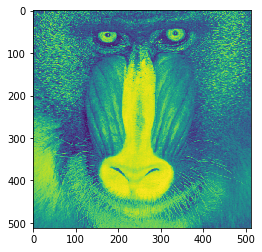

In [57]:
plt.imshow(mandrill[:,:,0])

To make it easier to work with (especially for `plt.imshow()`), we'll convert each pixel to a float from the default 8-bit per pixel integer coding. We divide by 255 to normalize it to the range [0-1].

In [52]:
import numpy as np
mandrill = np.array(mandrill, dtype=np.float64) / 255
mandrill

array([[[0.64313725, 0.58823529, 0.27843137],
        [0.24705882, 0.22352941, 0.12156863],
        [0.29411765, 0.16862745, 0.03921569],
        ...,
        [0.45882353, 0.46666667, 0.26666667],
        [0.55294118, 0.66666667, 0.39607843],
        [0.70196078, 0.7372549 , 0.4627451 ]],

       [[0.47058824, 0.49019608, 0.24313725],
        [0.52941176, 0.38039216, 0.12941176],
        [0.21568627, 0.1372549 , 0.09019608],
        ...,
        [0.47843137, 0.54901961, 0.38431373],
        [0.53333333, 0.62352941, 0.50196078],
        [0.47058824, 0.54117647, 0.29019608]],

       [[0.38823529, 0.29019608, 0.12156863],
        [0.51764706, 0.4627451 , 0.18039216],
        [0.23529412, 0.16078431, 0.14117647],
        ...,
        [0.4627451 , 0.36470588, 0.35294118],
        [0.34117647, 0.35686275, 0.30196078],
        [0.37647059, 0.31372549, 0.19215686]],

       ...,

       [[0.4745098 , 0.58039216, 0.60784314],
        [0.48235294, 0.61176471, 0.58823529],
        [0.48627451, 0

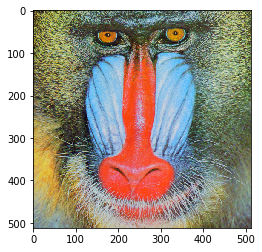

In [58]:
plt.imshow(mandrill)
plt.show()

Let's reshape it into a 2D array. This gives us a long array of [RGB pixel values](https://en.wikipedia.org/wiki/RGB_color_model).

In [64]:
#--this takes each level of the image and flattens it into a tall vector -- this is a list of pixels
row, col, dim = original_shape = tuple(mandrill.shape)
image_array = np.reshape(mandrill, (row * col, dim))
image_array

#--array([[red, green, blue]]) <---for each pixel, where first pixel corresponds to 0,0

array([[0.64313725, 0.58823529, 0.27843137],
       [0.24705882, 0.22352941, 0.12156863],
       [0.29411765, 0.16862745, 0.03921569],
       ...,
       [0.01960784, 0.03137255, 0.01960784],
       [0.00784314, 0.01960784, 0.        ],
       [0.01568627, 0.01960784, 0.00784314]])


* After running `KMeans`, you should have 16 centroids, where each centroid is a vector of 3 dimensions corresponding to the 16 quantized RGB values you need. Ensure that this is the case by looking at the `kmeans.cluster_centers_`, assuming `kmeans` is the result of your clustering.
* Replace the values in `image_array` with the centroid values. To know which cluster each pixel of `image_array` falls in, you can run `.predict(image_array)` on the result of your `KMeans` clustering. Then from the cluster, you can get the centroid value from `.cluster_centters_` mentioned above.
* Recreate the image data to be displayed. Show it with `plt.imshow()`. How does it look? By how much have we compressed the results?
* Try a few different values of *k* and compare the results.

In [65]:
#--This takes the color options from 256**3 to 16 -- easier for computational storage
kmeans = KMeans(n_clusters = 16, n_init=10, max_iter=200)
kmeans.fit(image_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
#--This is an array where there are 16 centroids (that denote the 16 colors) of 3 dimensions
clusters = kmeans.cluster_centers_

In [67]:
#--This shows that there are 16 centroids, where each centroid is a vector of 3 dimensions
len(kmeans.cluster_centers_)

16

In [74]:
#--This gives the cluster for each pixel -- this is the assigned cluster for each pixel
predicted_cluster = kmeans.predict(image_array)
predicted_cluster

array([5, 1, 1, ..., 1, 1, 1], dtype=int32)

In [72]:
#--Total num of pixels
len(kmeans.predict(image_array))

262144

In [73]:
#--These are the colors we want -- where each row has the red, green, blue intensities
print(kmeans.cluster_centers_)

[[0.6766311  0.68420143 0.45690052]
 [0.19071259 0.17161076 0.15336078]
 [0.29009736 0.2991062  0.23099119]
 [0.42164094 0.41010774 0.26103597]
 [0.65047191 0.76929279 0.8640316 ]
 [0.60054937 0.5109227  0.2666529 ]
 [0.90036417 0.36274205 0.32535774]
 [0.33757715 0.41036664 0.40053038]
 [0.72607    0.73469222 0.68169739]
 [0.79866018 0.6714234  0.28061156]
 [0.82483705 0.49518583 0.53387645]
 [0.38355441 0.53353613 0.64554794]
 [0.47927363 0.53217021 0.43761341]
 [0.56016827 0.63851141 0.60515411]
 [0.93085671 0.29445325 0.14879502]
 [0.46821764 0.71996065 0.89068747]]


In [76]:
#--Create an empty array of zeros that has the same shape as the initial image array--
#-- final_array[i,:] where i is each row and ,: refers to each column
final_array = np.zeros(image_array.shape)
for i, cluster in enumerate(predicted_cluster):
    final_array[i,:] = kmeans.cluster_centers_[cluster,:]

In [77]:
final_array = final_array.reshape(mandrill.shape)

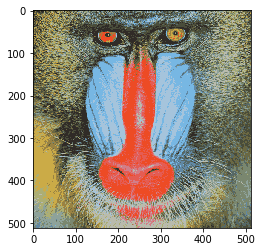

In [78]:
plt.imshow(final_array)
plt.show()

From the results, you can tell that, due to the decrease in the number of colors, the image looks flatter. 